In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 0.7601156069364162

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50       104
           1       0.78      0.91      0.84       242

    accuracy                           0.76       346
   macro avg       0.72      0.66      0.67       346
weighted avg       0.75      0.76      0.74       346


Confusion Matrix:
 [[ 42  62]
 [ 21 221]]

Predicted binary decision for sample car: buy
Probability of not_buy: 0.798
Probability of buy    : 0.202


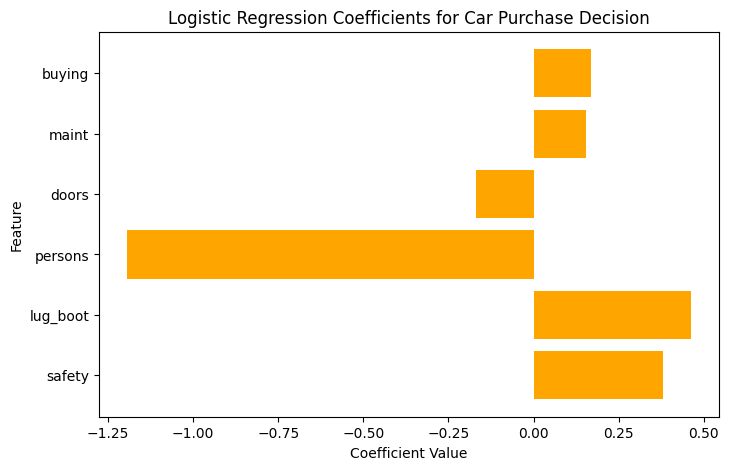

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ------------------ LOAD DATA ------------------ #
columns = ['buying','maint','doors','persons','lug_boot','safety','class']
df = pd.read_csv('car.data', names=columns)

# ------------------ BINARY TARGET ------------------ #
df['class'] = df['class'].replace({
    'unacc': 'not_buy',
    'acc': 'buy',
    'good': 'buy',
    'vgood': 'buy'
})

# ------------------ PREPROCESSING ------------------ #
encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------ MODEL ------------------ #
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# ------------------ EVALUATION ------------------ #
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ------------------ PREDICTION EXAMPLE ------------------ #
sample = pd.DataFrame([['high','low','4','more','big','high']], columns=columns[:-1])

for col in sample.columns:
    sample[col] = encoders[col].transform(sample[col])

pred_class = model.predict(sample)
pred_label = encoders['class'].inverse_transform(pred_class)

# Probabilities
pred_proba = model.predict_proba(sample)

print("\nPredicted binary decision for sample car:", pred_label[0])
print("Probability of not_buy:", round(pred_proba[0][0], 3))
print("Probability of buy    :", round(pred_proba[0][1], 3))

# ------------------ FEATURE IMPORTANCE (COEFFICIENTS) ------------------ #
coefficients = model.coef_[0]
feature_names = X.columns

plt.figure(figsize=(8,5))
plt.barh(feature_names, coefficients, color="orange")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Logistic Regression Coefficients for Car Purchase Decision")
plt.gca().invert_yaxis()
plt.show()


Accuracy: 0.9942196531791907

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       104
           1       1.00      1.00      1.00       242

    accuracy                           0.99       346
   macro avg       0.99      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346


Confusion Matrix:
 [[103   1]
 [  1 241]]

Predicted binary decision for sample car: buy


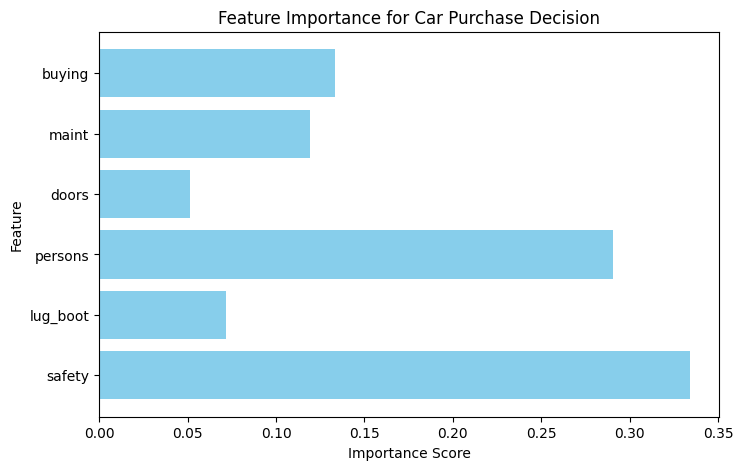

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# ------------------ LOAD DATA ------------------ #
columns = ['buying','maint','doors','persons','lug_boot','safety','class']
df = pd.read_csv('car.data', names=columns)

# ------------------ BINARY TARGET ------------------ #
df['class'] = df['class'].replace({
    'unacc': 'not_buy',
    'acc': 'buy',
    'good': 'buy',
    'vgood': 'buy'
})

# ------------------ PREPROCESSING ------------------ #
encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------ MODEL ------------------ #
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ------------------ EVALUATION ------------------ #
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ------------------ PREDICTION EXAMPLE ------------------ #
sample = pd.DataFrame([['high','low','4','more','big','high']], columns=columns[:-1])

for col in sample.columns:
    sample[col] = encoders[col].transform(sample[col])

pred_class = model.predict(sample)
pred_label = encoders['class'].inverse_transform(pred_class)

print("\nPredicted binary decision for sample car:", pred_label[0])

# ------------------ FEATURE IMPORTANCE ------------------ #
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Car Purchase Decision")
plt.gca().invert_yaxis()  # so most important is at top
plt.show()
